# Exploração de Dados de Acidentes Ambientais do IBAMA

Por meio dos dados abertos é disponibilizado pelo IBAMA uma base de registros de comunicação de acidentes ambientais. Vamos realizar uma exploração desses dados afim de encontrar informações relevantes e insights importantes sobre acidentes ambientais no Brasil.

In [25]:
# Importação da bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Leitura do dados CSV
df = pd.read_csv('http://siscom.ibama.gov.br/geoserver/publica/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=publica:adm_comunicacidente_p&outputFormat=csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,22,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
# Criação de novas colunas
df['mes_registro'] = pd.DatetimeIndex(pd.to_datetime(df['dt_registro'])).month
df['ano_registro'] = pd.DatetimeIndex(pd.to_datetime(df['dt_registro'])).year

In [28]:
# Tamanho do dataset
df.shape

(10983, 69)

In [29]:
# Informações das colunas, tipo de dados e total de valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10983 entries, 0 to 10982
Data columns (total 69 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FID                              10983 non-null  object 
 1   id_ocorrencia                    10983 non-null  int64  
 2   id_municipio                     9230 non-null   float64
 3   id_uf                            10764 non-null  float64
 4   id_responsavel                   4552 non-null   float64
 5   des_complemento_tipo_localizaca  2500 non-null   object 
 6   des_complemento_tipo_evento      2295 non-null   object 
 7   des_complemento_instituicao_atu  3465 non-null   object 
 8   des_complemento_tipo_dano_ident  2313 non-null   object 
 9   des_danos                        0 non-null      float64
 10  des_ocorrencia                   5775 non-null   object 
 11  dt_ocorrencia                    5106 non-null   object 
 12  hr_ocorrencia     

In [30]:
# Alguns dados estatísticos básicos das colunas numéricas
df.describe()

,id_ocorrencia,id_municipio,id_uf,id_responsavel,des_danos,des_informacoes_adicionais,acao_inicial_tomada,nro_ocorrencia,volume_estimado,id_bacia_sedimentar,dia_semana,dia_semana_primeira_obs,dia_semana_registro,feicao_proxima,mes_registro,ano_registro
count,10983.000000,9.230000e+03,10764.000000,4552.000000,0.0,0.0,0.0,1.098300e+04,1.312000e+03,1458.000000,0.0,0.0,0.0,0.0,10983.000000,10983.000000
mean,6690.029409,3.324635e+06,16.709773,6090.005272,NaN,NaN,NaN,2.347868e+11,3.051182e+04,14.928669,NaN,NaN,NaN,NaN,6.798871,2013.937995
std,3736.152483,8.623724e+05,6.409754,1569.667491,NaN,NaN,NaN,5.565880e+11,1.104315e+06,1.953225,NaN,NaN,NaN,NaN,3.367449,3.977065
min,312.000000,0.000000e+00,0.000000,3270.000000,NaN,NaN,NaN,1.000000e+02,0.000000e+00,4.000000,NaN,NaN,NaN,NaN,1.000000,2000.000000
25%,3414.000000,3.114501e+06,13.000000,4713.250000,NaN,NaN,NaN,1.240500e+03,5.000000e-04,15.000000,NaN,NaN,NaN,NaN,4.000000,2010.000000
50%,6589.000000,3.301009e+06,16.000000,6221.500000,NaN,NaN,NaN,2.967000e+03,8.000000e-03,15.000000,NaN,NaN,NaN,NaN,7.000000,2013.000000
75%,10095.500000,3.550308e+06,24.000000,7436.250000,NaN,NaN,NaN,2.018124e+11,1.270000e-01,16.000000,NaN,NaN,NaN,NaN,10.000000,2018.000000
max,13016.000000,5.300108e+06,27.000000,8677.000000,NaN,NaN,NaN,2.020103e+12,4.000000e+07,17.000000,NaN,NaN,NaN,NaN,12.000000,2020.000000


In [31]:
# Percentual de valores NULOS nas colunas
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

feicao_proxima                1.0
des_informacoes_adicionais    1.0
des_danos                     1.0
acao_inicial_tomada           1.0
dia_semana_registro           1.0
                             ... 
legado                        0.0
validado                      0.0
geom                          0.0
dt_carga                      0.0
FID                           0.0
Length: 69, dtype: float64

In [32]:
# Configuraçõe dos gráficos
plt.rcParams['figure.figsize'] = (11,7)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['font.size'] = 20 
plt.rcParams['axes.titlesize'] = 20

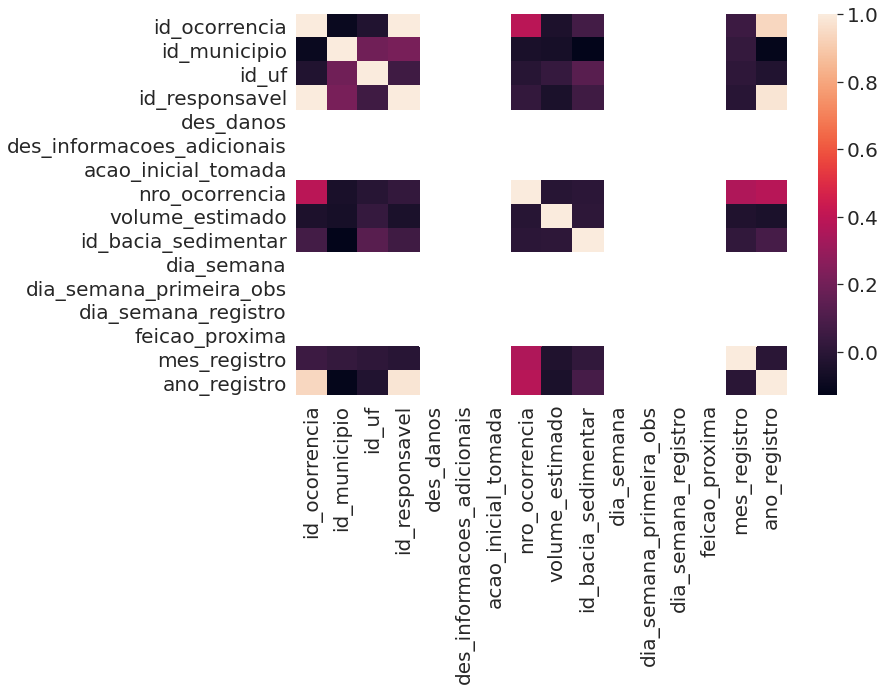

In [33]:
# Corelação entre as colunas
sns.heatmap(df.corr());

## Análise Geral dos Acidentes

Um resumo geral de algumas informações que chamam atenção e podem ser relavantes. Podemos identificar o periodo dos registros, o total de registros, o estado com maior número de acidentes dentre outras informações.

In [34]:
# Resumo GERAL dos dados
resumo=[['Período de Registro dos Acidentes',str(df['ano_registro'].min()) + ' até ' + str(df['ano_registro'].max())],
        ['Total de Acidentes Registrados', df.shape[0]],
        ['Ano com Mais Acidentes Registrados', df['ano_registro'].value_counts().idxmax()],
        ['Origem mais Comum dos Acidentes', df['origem'].value_counts().idxmax()],
        ['Estado com Mais Acidentes Registrados', df['uf'].value_counts().idxmax()],
        ['Tipos de Danos Mais Comuns', ', '.join(df['tipos_danos_identificados'].value_counts().head(3).index)]]
df_resumo = pd.DataFrame(resumo, columns=['Fato','Informação'])
df_resumo

,Fato,Informação
0,Período de Registro dos Acidentes,2000 até 2020
1,Total de Acidentes Registrados,10983
2,Ano com Mais Acidentes Registrados,2010
3,Origem mais Comum dos Acidentes,Rodovia
4,Estado com Mais Acidentes Registrados,MG
5,Tipos de Danos Mais Comuns,"Outro(s), Mar, Solo"


Informações de quais são os tipos de acidentes mais comuns. Aqui já podemos ver que o tipo mais comum, não podemos identificar e ele corresponde a mais de 50% dos acidentes.

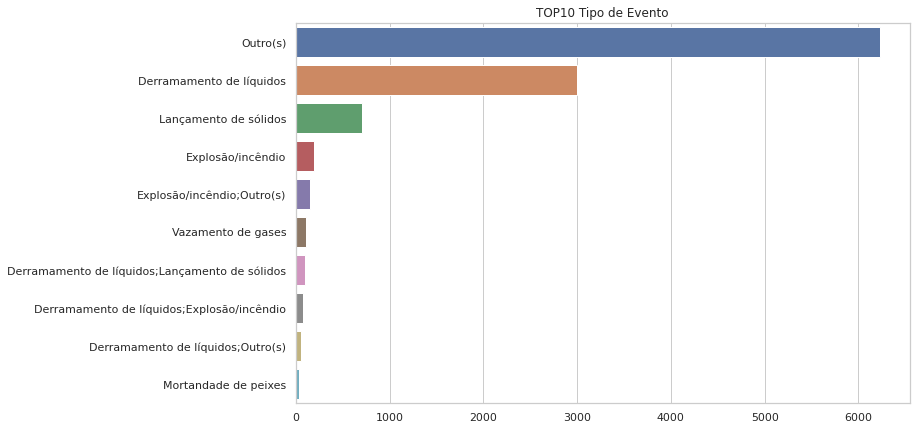

In [35]:
sns.set_theme(style="whitegrid")
x = df['tipo_evento'].value_counts().head(10).values
y = df['tipo_evento'].value_counts().head(10).index
ax = sns.barplot(x=x, y=y).set_title('TOP10 Tipo de Evento')

Nas instituições fica um pensamento, por que em mais de 50% dos acidentes ambientais, não tem atuação de orgão oficiais do governo? Logo pensamos, será que a maioria dos acidentes ambientais os culpados não são punidos?

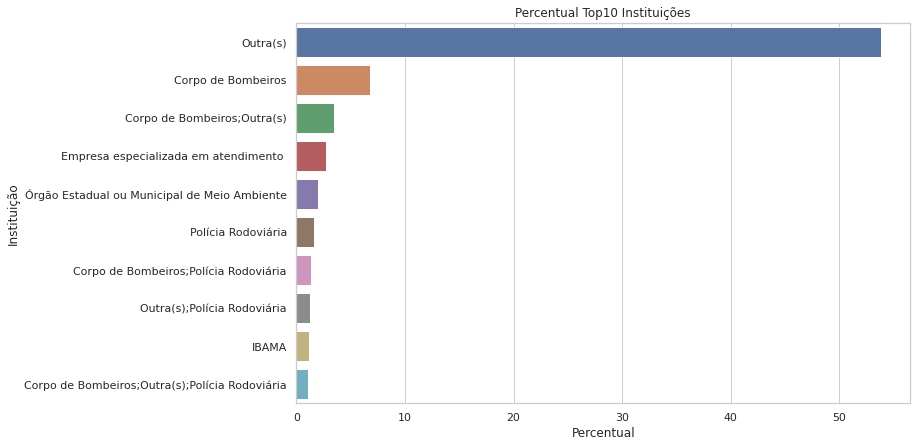

In [36]:
institiuicoes_atuando = {'Instituição': (df['institiuicoes_atuando_local'].value_counts()/df.shape[0]*100).head(10).index,
                         'Percentual':  (df['institiuicoes_atuando_local'].value_counts()/df.shape[0]*100).head(10).values
              }
df_institiuicoes_atuando = pd.DataFrame(institiuicoes_atuando)

y = df_institiuicoes_atuando.head(10)['Instituição']
x = df_institiuicoes_atuando.head(10)['Percentual']
ax = sns.barplot(x=x, y=y).set_title('Percentual Top10 Instituições')

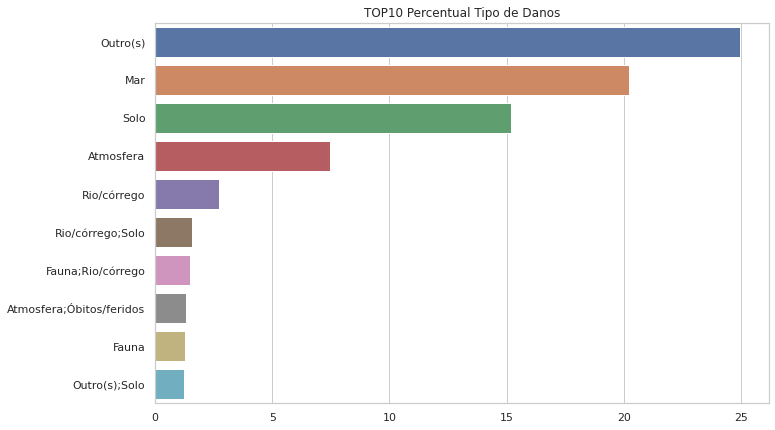

In [37]:
x = (df['tipos_danos_identificados'].value_counts()/df.shape[0]*100).head(10).values
y = (df['tipos_danos_identificados'].value_counts()/df.shape[0]*100).head(10).index
ax = sns.barplot(x=x, y=y).set_title('TOP10 Percentual Tipo de Danos')

Na origem dos acidentes, o notável é que são as rodovias a mais comum das origens, revelando outros problemas do Brasil. Problemas de educação no trânsito, problemas nas estradas que são problemas não só para acidentes ambientais.

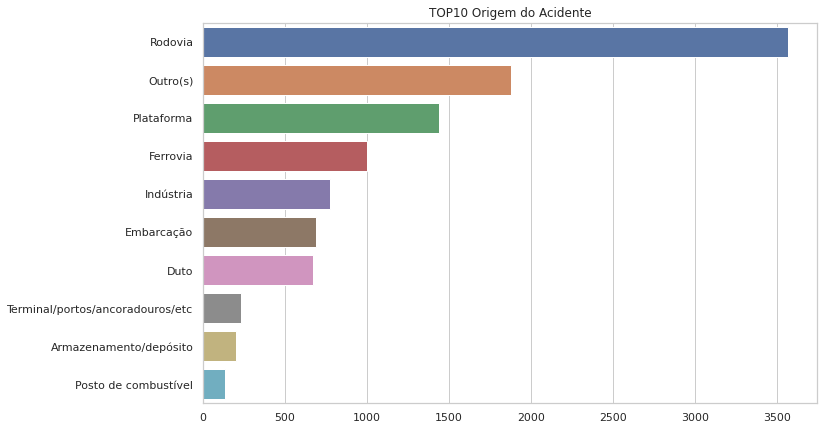

In [38]:
x = (df['origem'].value_counts()).head(10).values
y = (df['origem'].value_counts()).head(10).index
ax = sns.barplot(x=x, y=y).set_title('TOP10 Origem do Acidente')

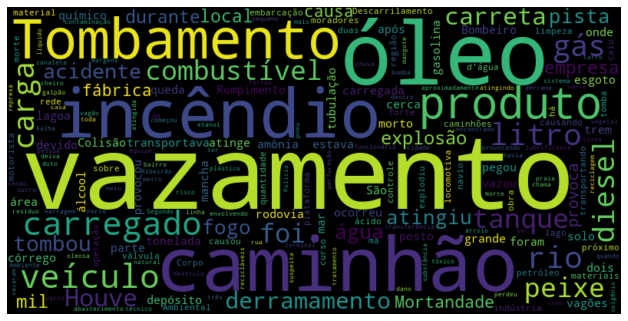

In [39]:
from wordcloud import WordCloud

todos_itens = ' '.join(s for s in df['des_ocorrencia'].apply(str).values)
todos_itens = todos_itens.replace(';',  ' ').replace('/',  ' ')
stop_words = ['nan','de','etc','(s)','do','da','por','para','entre','se','um',
              'uma','na','no','pela','pelo','ao','com','que','em','dos','das',
              'ainda','não','o','a','os','as','está','ficou','pode','nas','nos']

wc = WordCloud(background_color="black", 
               stopwords=stop_words,
               collocations=False, 
               width=800, height=400)
wordcloud = wc.generate(todos_itens)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off") 
plt.show()

## Análise dos Acidentes por Período

Em uma análise mensal é notável que , após o meio do ano os números de acidentes ambientais tendem a ter uma crescente.

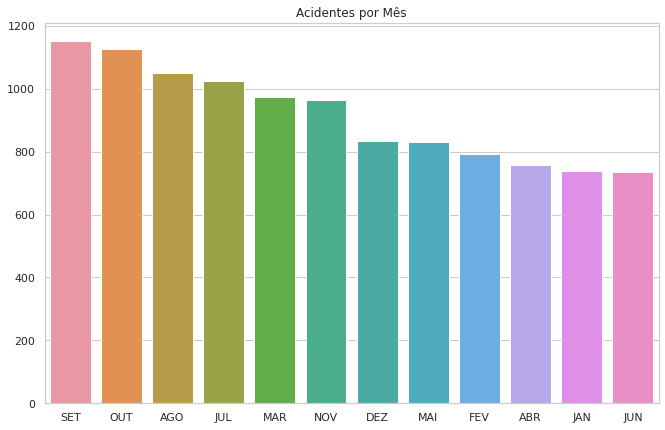

In [40]:
meses=[[1,'JAN'],[2,'FEV'],[3,'MAR'],[4,'ABR'],[5,'MAI'],[6,'JUN'],
       [7,'JUL'],[8,'AGO'],[9,'SET'],[10,'OUT'],[11,'NOV'],[12,'DEZ']]

df_meses = pd.DataFrame(meses, columns=['mes_registro','mes'])

total_mes = df[['mes_registro']].join(df_meses.set_index('mes_registro'), on='mes_registro')['mes'].value_counts()
mes_evento = {'Mês': total_mes.index,
              'Quantidade':  total_mes.values
              }

df_mes_evento = pd.DataFrame(mes_evento)

x = total_mes.index
y = total_mes.values
ax = sns.barplot(x=x, y=y).set_title('Acidentes por Mês')

Podemos ver uma grande oscilação entre alguns anos. Seria uma falta de registros? Ou realmente tivemos uma queda brusca no número de acidentes?

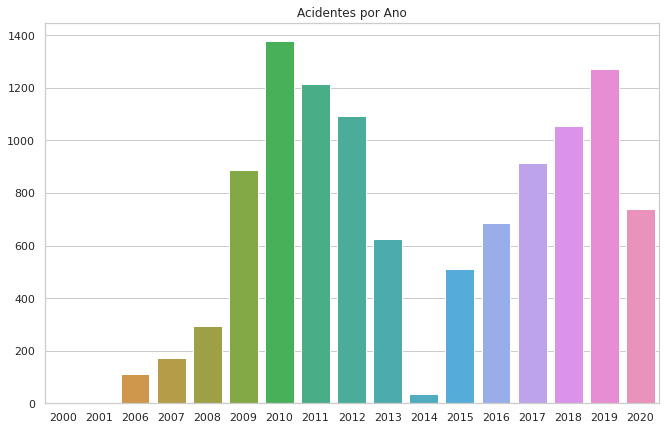

In [41]:
total_ano = df['ano_registro'].value_counts().sort_index(ascending=True)

x = total_ano.index
y = total_ano.values
ax = sns.barplot(x=x, y=y).set_title('Acidentes por Ano')

Top 5 Anos com mais acidentes, o que levou esse aumento?

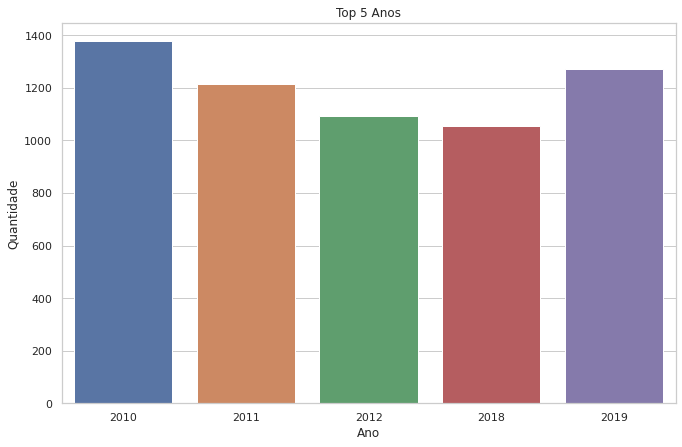

In [42]:
ano_evento = {'Ano': df['ano_registro'].value_counts().sort_index(ascending=True).index,
              'Quantidade':  df['ano_registro'].value_counts().sort_index(ascending=True).values
              }
df_ano_evento = pd.DataFrame(ano_evento)

x = df_ano_evento.sort_values('Quantidade', ascending=False).head(5)['Ano']
y = df_ano_evento.sort_values('Quantidade', ascending=False).head(5)['Quantidade']
ax = sns.barplot(x=x, y=y).set_title('Top 5 Anos')

Top 5 Meses com mais acidentes, o que leva o aumento nesses meses?

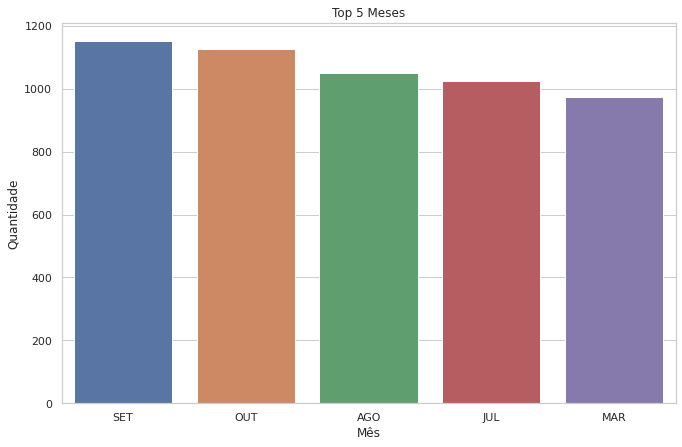

In [43]:
x = df_mes_evento.head(5)['Mês']
y = df_mes_evento.head(5)['Quantidade']
ax = sns.barplot(x=x, y=y).set_title('Top 5 Meses')

## Análise dos Acidentes por Localização

60% dos acidentes ambientais no Brasil estão concentrados em MG, SP e RJ. Se incluimos o ES nessa lista, temos a redião SUDESTE com aproximadamente 64% dos acidentes.

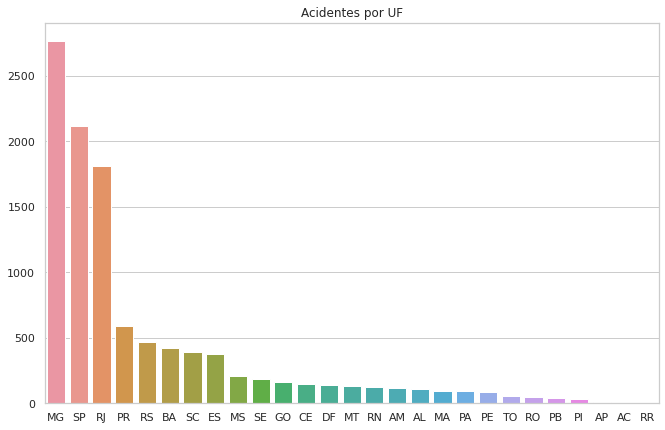

In [44]:
x = df['uf'].value_counts().index
y = df['uf'].value_counts().values
ax = sns.barplot(x=x, y=y).set_title('Acidentes por UF')

In [45]:
print('Percentual de acidentes do TOP 3', df[['uf']].value_counts().loc[['MG','SP','RJ']].sum()/df.shape[0])
print('Percentual de acidentes região SUDESTE', df[['uf']].value_counts().loc[['MG','SP','RJ','ES']].sum()/df.shape[0])

Percentual de acidentes do TOP 3 0.6094873896021124
Percentual de acidentes região SUDESTE 0.6435400163889647


Dos 5 municípios com mais acidentes, todos eles estão na região SUDESTE. Região que concentra o maior índice de acidentes do país.

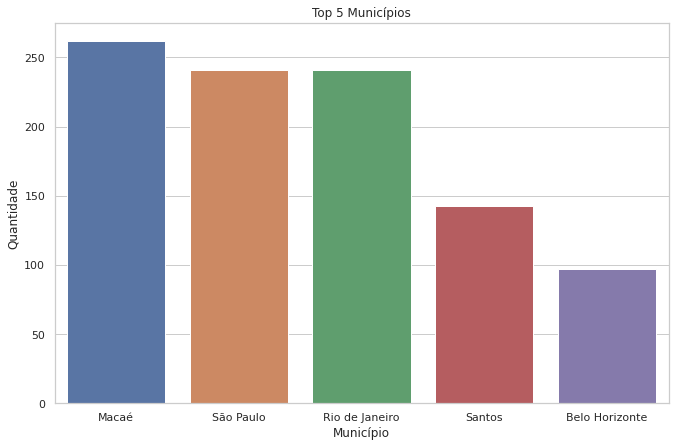

In [46]:
municipio = {'Posição': list(range(1, df[['municipio','uf']].value_counts().shape[0] + 1)),
             'Município': df[['municipio','uf']].value_counts().index.to_frame(index=False)['municipio'],
             'UF': df[['municipio','uf']].value_counts().index.to_frame(index=False)['uf'],
             'Quantidade': df[['municipio','uf']].value_counts().values}
df_municipio = pd.DataFrame(municipio)

x = df_municipio.head(5)['Município']
y = df_municipio.head(5)['Quantidade']
ax = sns.barplot(x=x, y=y).set_title('Top 5 Municípios')

Mas se fizermos uma análise com os top 5 do estado com maior número de acidentes (MG), somente 1 (Belo Horizonte) está no top 5 dos municípios do Brasil todo.

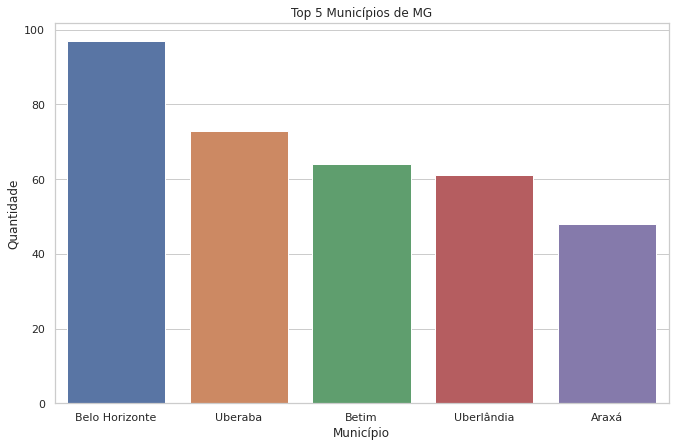

In [47]:
x = df_municipio.query('UF == "MG"').head(5)['Município']
y = df_municipio.query('UF == "MG"').head(5)['Quantidade']
ax = sns.barplot(x=x, y=y).set_title('Top 5 Municípios de MG')

In [48]:
df_municipio.query('UF == "MG"').head(5)

,Posição,Município,UF,Quantidade
4,5,Belo Horizonte,MG,97
5,6,Uberaba,MG,73
8,9,Betim,MG,64
10,11,Uberlândia,MG,61
18,19,Araxá,MG,48
